In [8]:
#make a classifier that can identify a vehicle as newable energy or not
!unzip data/model3.zip
!unzip data/mustang.zip

Archive:  data/model3.zip
   creating: model3/
  inflating: __MACOSX/._model3       
  inflating: model3/image34.jpeg     
  inflating: __MACOSX/model3/._image34.jpeg  
  inflating: model3/2019_Tesla_Model_3_Performance_AWD_Front.jpg  
  inflating: __MACOSX/model3/._2019_Tesla_Model_3_Performance_AWD_Front.jpg  
  inflating: model3/Highland-Model-3-Supercharging.jpg  
  inflating: __MACOSX/model3/._Highland-Model-3-Supercharging.jpg  
  inflating: model3/Tesla-model-3-highland-deliveries-australia-.jpg  
  inflating: __MACOSX/model3/._Tesla-model-3-highland-deliveries-australia-.jpg  
  inflating: model3/2024.02-Tesla-model-3-updated-highland-KYLE-02-scaled-e1708033225144.jpg  
  inflating: __MACOSX/model3/._2024.02-Tesla-model-3-updated-highland-KYLE-02-scaled-e1708033225144.jpg  
  inflating: model3/2024-Tesla-Model-3-18.jpg  
  inflating: __MACOSX/model3/._2024-Tesla-Model-3-18.jpg  
  inflating: model3/image96.jpeg     
  inflating: __MACOSX/model3/._image96.jpeg  
  inflating: mod

In [45]:
#install dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import keras

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
data = tf.keras.utils.image_dataset_from_directory('test_data')

Found 229 files belonging to 2 classes.


In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

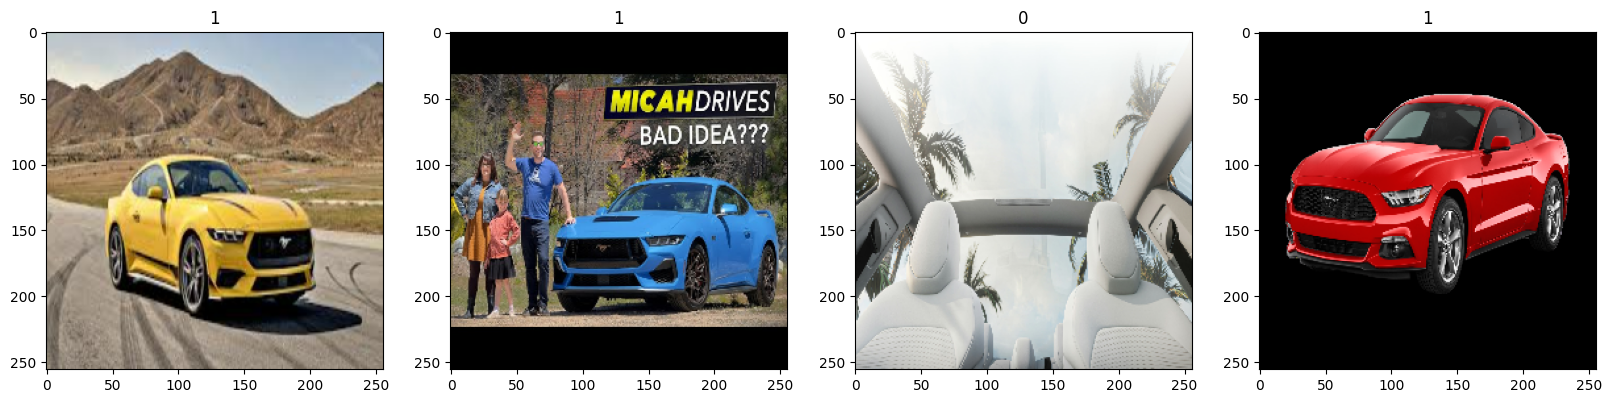

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
data = tf.keras.utils.image_dataset_from_directory('test_data').map(lambda x,y: (x/255, y))
batch = data.as_numpy_iterator().next()
#batch[0] is a list of images stored as numpy matrices
#batch[1] is a list of labels to each corresponding image

Found 229 files belonging to 2 classes.


1.0


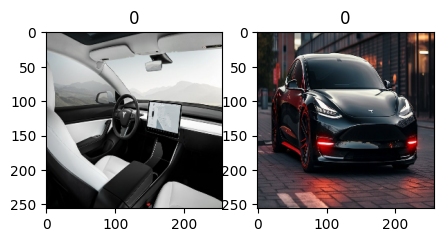

In [38]:
print(batch[0].max())
fig, ax = plt.subplots(ncols=2, figsize=(5,5))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [39]:
len(data)

8

In [40]:
train_size = int(len(data)*.75)
val_size = int(len(data)*.25)
test_size = int(len(data)*.1)

In [41]:
print(train_size, val_size, test_size)

6 2 0


In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [54]:
#time to build the deep learning model!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [55]:
model = Sequential()

In [56]:
model.add(keras.Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
logdir='logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4430 - loss: 1.9909 - val_accuracy: 0.6757 - val_loss: 0.6791
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6199 - loss: 0.6737 - val_accuracy: 0.4865 - val_loss: 0.6700
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5784 - loss: 0.6450 - val_accuracy: 0.9189 - val_loss: 0.5733
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8134 - loss: 0.5556 - val_accuracy: 0.7297 - val_loss: 0.4495
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7229 - loss: 0.4935 - val_accuracy: 0.7297 - val_loss: 0.4539
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7715 - loss: 0.4415 - val_accuracy: 0.9189 - val_loss: 0.3207
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8870 - loss: 0.3087 - val_accuracy: 0.9189 - val_loss: 0.2283
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9051 - loss: 0.2467 - val_accuracy: 0.9730 - val_loss: 0.2006
Epoch 9/20
6/6

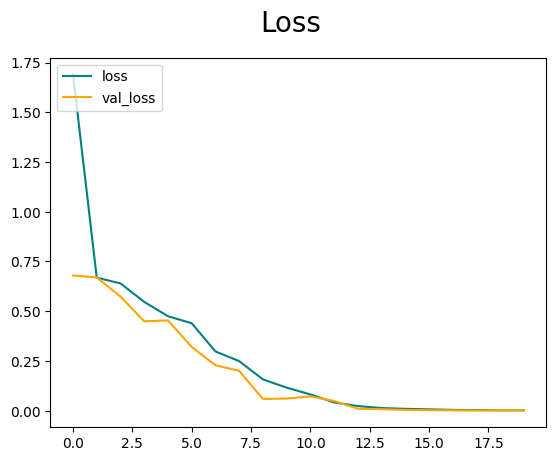

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

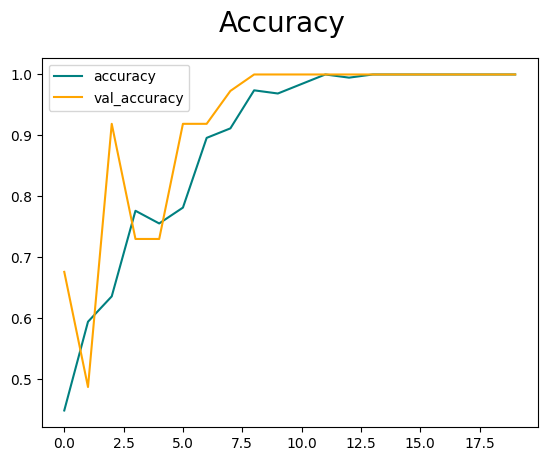

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [64]:
# eval
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [67]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.0, Recall: 0.0, Accuracy: 0.0


**Manual Testing the Classifier**

In [69]:
import cv2

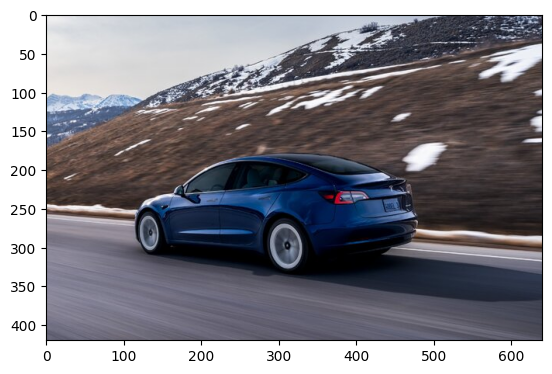

In [73]:
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

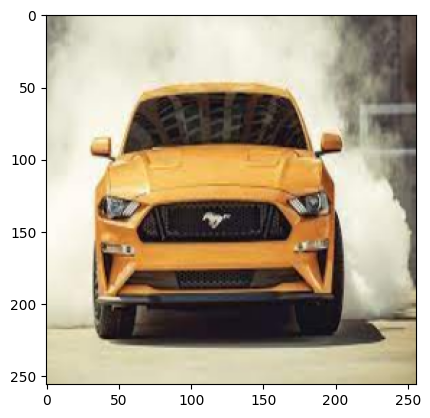

In [171]:
img = cv2.imread('mus.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [172]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [173]:
if yhat > 0.5:
    print(f'Predicted class not EV')
else:
    print(f'Predicted class is EV')

Predicted class not EV


In [174]:
print(yhat)

[[0.99931073]]


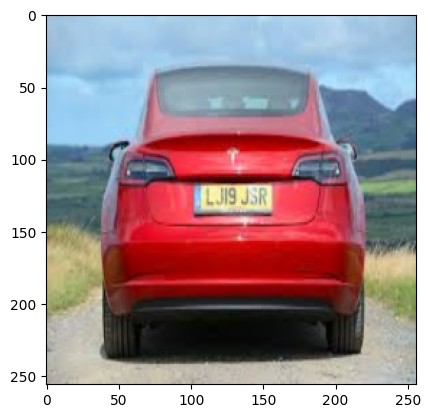

In [163]:
img = cv2.imread('ass.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [164]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [165]:
if yhat > 0.5:
    print(f'Predicted class is not EV')
else:
    print(f'Predicted class is EV')

Predicted class is EV


In [162]:
print(yhat)

[[0.1662134]]
